<a href="https://colab.research.google.com/github/AdithyaDVarma/Biology_AI-in-agriculture_Semester1/blob/main/Salary_Prediction_AIE_B_Project_Sem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [555]:
# importing the necessary modules and packages
import os
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn import linear_model 
import statsmodels.formula.api as smf

**DATA HANDLING**

In [556]:
#Creating the YearsExperience vs Salary data using training set csv
import csv
import random
f=open("Trainingset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,exp**3,(age+exp)*educ,sal])
f.close()

f=open("Testset.csv","w")
w=csv.writer(f)
w.writerow(["Age","YearsExperience","Years of Education","QYearsExperience","CYearsExperience","CombinedParameter","Salary"])

for i in range(500):
  age=random.uniform(24,65)
  if age>=24 and age<=30:
      exp=random.uniform(1,4.3)
      educ=random.randint(3,6)
      sal=random.uniform(40000.7,60000.54)
  elif age>=31 and age<=40:
      exp=random.uniform(4.6,7.8)
      educ=random.randint(3,7)
      sal=random.uniform(50000.7,80000.54)
  elif age>=41 and age<=50:
      exp=random.uniform(7,12)
      educ=random.randint(5,9)
      sal=random.uniform(60000.7,90000.54)
  elif age>=51:
      exp=random.uniform(12,20)
      educ=random.randint(3,9)
      sal=random.uniform(50000.7,100000.54)
      w.writerow([age,exp,educ,exp**2,exp**3,(age+exp)*educ,sal])
f.close()




In [557]:
# Initializing the trainingset and testset data objects using pandas
Testset = pd.read_csv("Testset.csv")
Training = pd.read_csv("Trainingset.csv") 

#The head() function is used to get the first few rows of the Testset
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583


In [558]:
# Using the data object  to find some general values like mean, minimum etc
Testset.describe()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,57.820887,16.119508,5.984293,265.392297,4456.760583,441.689788,75685.074530
std,3.817763,2.362834,2.063407,76.213810,1874.307193,152.804623,14624.764031
min,51.051406,12.080028,3.000000,145.927085,1762.803331,201.652990,50325.921546
25%,54.833223,14.094446,4.000000,198.654027,2799.936090,295.629160,62519.330577
50%,57.781827,16.121967,6.000000,259.917820,4190.386523,444.992726,76680.810569
75%,60.578333,18.290520,8.000000,334.543144,6118.968597,569.075602,88881.674476
max,64.989830,19.947424,9.000000,397.899731,7937.074698,739.152956,99778.341685


In [559]:
# corr() is used to find the pairwise correlation of all columns in the data we provided.
# The closer its value is to 1, the more variability the model explains.
Testset.corr()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary
Age,1.000000,-0.029242,-0.068661,-0.021954,-0.015066,0.088060,0.074691
YearsExperience,-0.029242,1.000000,-0.052200,0.997932,0.992039,0.034546,-0.062632
Years of Education,-0.068661,-0.052200,1.000000,-0.052777,-0.054089,0.981826,-0.066100
QYearsExperience,-0.021954,0.997932,-0.052777,1.000000,0.998075,0.034160,-0.063532
CYearsExperience,-0.015066,0.992039,-0.054089,0.998075,1.000000,0.032634,-0.063504
CombinedParameter,0.088060,0.034546,0.981826,0.034160,0.032634,1.000000,-0.056651
Salary,0.074691,-0.062632,-0.066100,-0.063532,-0.063504,-0.056651,1.000000


YEARS OF EXPERIENCE VS SALARY

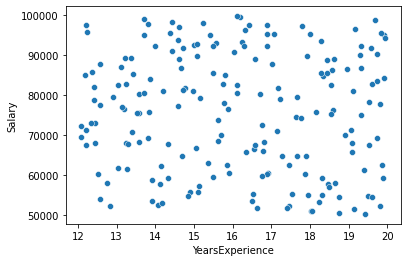

In [560]:
# We are using seaborn, which is used to display mathematical scatter plot of the given data
sns.scatterplot(data=Testset, x="YearsExperience",y="Salary")

In [561]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["YearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["YearsExperience"]])

In [562]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,76168.151303
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,76325.696746
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,74649.079518
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,76478.365403
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,75459.894371


In [563]:
# Created a new column to show the error current salary minus predicted salary
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,76168.151303,-23690.167260
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,76325.696746,-855.540491
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,74649.079518,-20073.391170
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,76478.365403,10481.079968
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,75459.894371,17983.310212


Text(0.5, 1.0, 'Linear Regression: Years of Experience vS Corresponding Salary ')

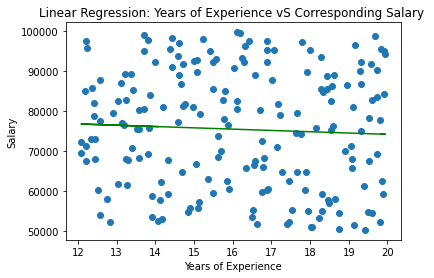

In [564]:
# Plotting Linear Regression graph with Sklearn  
plt.scatter(Testset["YearsExperience"], Testset["Salary"])
plt.plot(Testset["YearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression: Years of Experience vS Corresponding Salary ")

In [565]:
m=lm.coef_

In [566]:
b=lm.intercept_

In [615]:
#Testing for 7 years of experience
Salary = b + m *11.3
Salary

array([[77376.50355158]])

In [616]:
lm.predict([[11.3]]) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[77376.50355158]])

In [569]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


AGE VS SALARY CONDITION

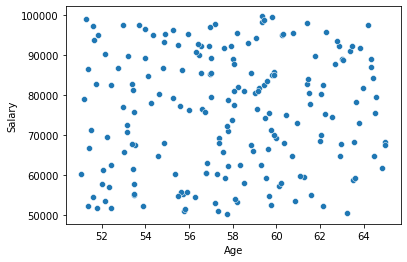

In [570]:
sns.scatterplot(data=Testset, x="Age",y="Salary")

In [571]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Age"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Age"]])

In [572]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,75075.640995,-22597.656953
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,73917.495340,1552.660915
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,77042.747173,-22467.058825
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,73963.415788,12996.029583
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,76253.100691,17190.103892


Text(0.5, 1.0, 'Linear Regression: Age vS Corresponding Salary ')

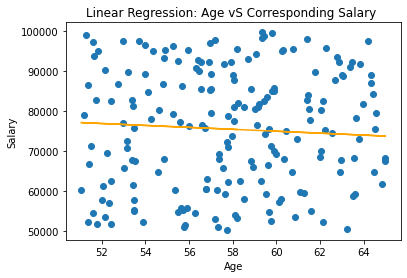

In [573]:
plt.scatter(Testset["Age"], Testset["Salary"])
plt.plot(Testset["Age"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.title("Linear Regression: Age vS Corresponding Salary ")

In [574]:
m=lm.coef_

In [575]:
b=lm.intercept_

In [576]:
#Testing for 7 years of experience
Salary = b + m * 7
Salary

array([[87829.37403871]])

In [577]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[87829.37403871]])

In [578]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


YEARS OF EDUCATION VS SALARY

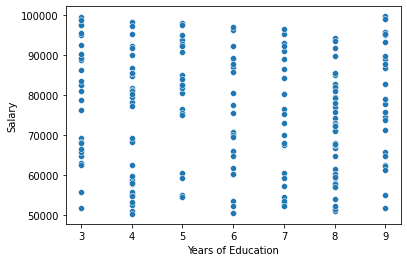

In [579]:
sns.scatterplot(data=Testset, x="Years of Education",y="Salary")

In [580]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["Years of Education"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["Years of Education"]])

In [581]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,74464.656261,-21986.672218
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,75681.268588,-211.112334
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,76289.574752,-21713.886403
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,75681.268588,11278.176783
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,77506.187079,15937.017504


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

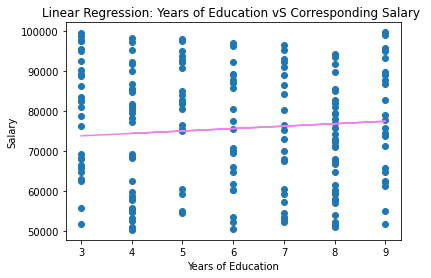

In [582]:
plt.scatter(Testset["Years of Education"], Testset["Salary"])
plt.plot(Testset["Years of Education"],Testset["Predicted Salary Using Sklearn method"], color="violet")
plt.ylabel("Salary")
plt.xlabel("Years of Education")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [583]:
m=lm.coef_

In [584]:
b=lm.intercept_


In [585]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[76289.5747518]])

In [586]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[76289.5747518]])

In [587]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


THREE PARAMETERS VS SALARY


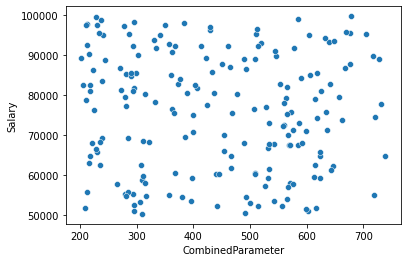

In [588]:
sns.scatterplot(data=Testset, x="CombinedParameter",y="Salary")

In [589]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["CombinedParameter"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["CombinedParameter"]])

In [590]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,74745.669346,-22267.685304
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,75780.465192,-310.308938
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,75921.978338,-21346.289990
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,75756.872076,11202.573295
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,76802.848100,16640.356483


Text(0.5, 1.0, 'Linear Regression: Combined Parameters vS Corresponding Salary ')

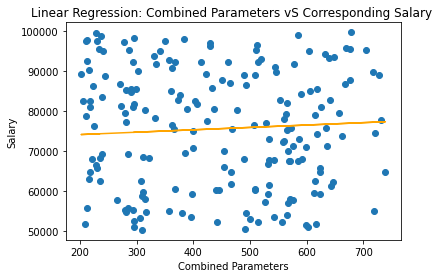

In [591]:
plt.scatter(Testset["CombinedParameter"], Testset["Salary"])
plt.plot(Testset["CombinedParameter"],Testset["Predicted Salary Using Sklearn method"], color="orange")
plt.ylabel("Salary")
plt.xlabel("Combined Parameters")
plt.title("Linear Regression: Combined Parameters vS Corresponding Salary ")

In [592]:
m=lm.coef_

In [593]:
b=lm.intercept_

In [594]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[73026.04253879]])

In [595]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[73026.04253879]])

In [596]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


QUADRATIC YEARS OF EDUCATION VS SALARY


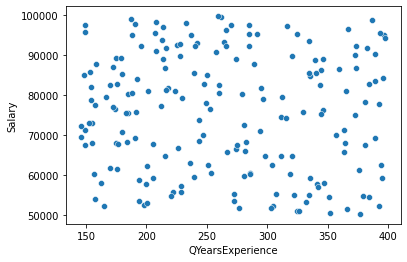

In [597]:
sns.scatterplot(data=Testset, x="QYearsExperience",y="Salary")

In [598]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved

lm = linear_model.LinearRegression(). fit(Training[["QYearsExperience"]],Training[["Salary"]])
# Using the predict method
result=lm.predict (Testset[["QYearsExperience"]])

In [599]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,76188.304404,-23710.320361
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,76325.697996,-855.541742
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,74616.706306,-20041.017957
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,76454.248710,10505.196661
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,75511.212313,17931.992270


Text(0.5, 1.0, 'Linear Regression: Years of experience vS Corresponding Salary ')

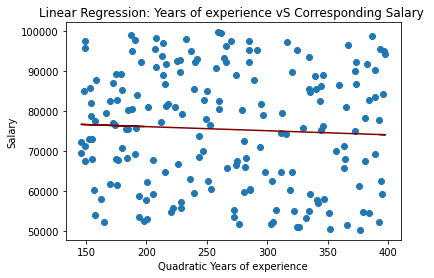

In [600]:
plt.scatter(Testset["QYearsExperience"], Testset["Salary"])
plt.plot(Testset["QYearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="maroon")
plt.ylabel("Salary")
plt.xlabel("Quadratic Years of experience")
plt.title("Linear Regression: Years of experience vS Corresponding Salary ")

In [601]:
m=lm.coef_

In [602]:
b=lm.intercept_

In [603]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[78147.64599997]])

In [604]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[78147.64599997]])

In [605]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


CUBIC YEARS OF EXPERIENCE VS SALARY

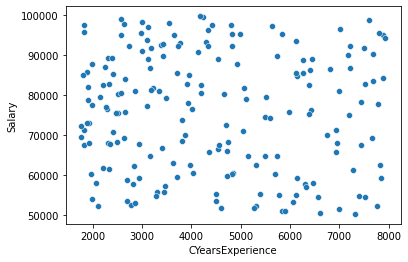

In [606]:
sns.scatterplot(data=Testset, x="CYearsExperience",y="Salary")

In [607]:
# Conducting Linear Regression method and inserting data using the fit method
# Fit function adjusts weights according to data values so that better accuracy can be achieved
#Dataset = pd.read_csv("T.csv")
lm = linear_model.LinearRegression(). fit(Training[["CYearsExperience"]],Training[["Salary"]])
# Using the predict method

result=lm.predict(Testset[["CYearsExperience"]])

In [608]:
# Creating a new column to place contents of the result variable
Testset["Predicted Salary Using Sklearn method"]= result
Testset["Prediction Error Using Sklearn method"] = Testset["Salary"]-Testset["Predicted Salary Using Sklearn method"]
Testset.head()

,Age,YearsExperience,Years of Education,QYearsExperience,CYearsExperience,CombinedParameter,Salary,Predicted Salary Using Sklearn method,Prediction Error Using Sklearn method
0,59.736875,14.069381,4,197.947482,2784.998537,295.225026,52477.984042,76200.462460,-23722.478417
1,64.525825,13.585205,6,184.557800,2507.255581,468.666181,75470.156254,76318.224764,-848.068509
2,51.602862,18.737861,7,351.107451,6579.002768,492.385065,54575.688348,74591.814361,-20016.126013
3,64.335943,13.116017,6,172.029900,2256.347083,464.711761,86959.445371,76424.609325,10534.836046
4,54.868062,16.246028,9,263.933438,4287.870130,640.026815,93443.204583,75563.248745,17879.955838


Text(0.5, 1.0, 'Linear Regression: Years of Education vS Corresponding Salary ')

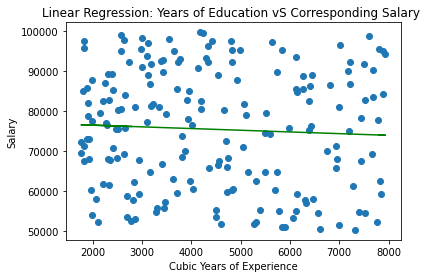

In [609]:
plt.scatter(Testset["CYearsExperience"], Testset["Salary"])
plt.plot(Testset["CYearsExperience"],Testset["Predicted Salary Using Sklearn method"], color="green")
plt.ylabel("Salary")
plt.xlabel("Cubic Years of Experience")
plt.title("Linear Regression: Years of Education vS Corresponding Salary ")

In [610]:
m=lm.coef_

In [611]:
b=lm.intercept_

In [612]:
#Testing for 7 years of education
Salary = b + m * 7
Salary

array([[77378.32674059]])

In [613]:
lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[77378.32674059]])

In [614]:
assert Salary == lm.predict([[7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
